# MK Praktikum Unggulan Universitas Gunadarma
# Nama Mata Kuliah: Praktikum Komputasi Big Data (Tingkat 2)  
---
### Overview Dataset

Dataset yang digunakan pada pertemuan ini adalah "Data Sensus Penghasilan". Data ini diambil dari database biro Sensus 1994 oleh Ronny Kohavi dan Barry Becker (Data Mining and Visualization, Silicon Graphics).

Data set ini berisikan beberapa kategori sebagai berikut:
* age
* sex
* race
* education
* marital-status
* workclass
* occupation
* relationship
* native-country
* hours-per-week
* capital-loss
* capital-gain
* fnlwgt

# Exploratory Data Analysis (EDA)

Pada praktikum ini, Anda akan melihat beberapa contoh Exploratory Data Analysis (EDA) pada data set sensus penghasilan. 

* [Pengambilan Data](#1)
* [Univariate Analysis](#2)
* [Bivariate Analysis](#3)

# Instruksi Tugas Praktikum FIKTI dan FTI

<div class ="alert alert-info">
    <strong>Daftar Program Studi:</strong><br>
    <hr>
    <strong> Fakultas Ilmu Komputer dan Teknologi Informasi</strong><br>
    - Sistem Informasi (S1 - SI)<br>
    - Sistem Komputer (S1 - SK)<br>
    - Program Studi Manajemen Informatika (D3 - MI)<br>
    - Program Studi Teknik Komputer (D3 - TK)<br><br>
    <strong> Fakultas Teknologi Industri</strong><br>
    - Informatika (S1)<br>
    - Teknik Mesin (S1)<br>
    - Teknik Industri (S1)<br>
    - Teknik Elektro (S1)<br>
    - Agroteknologi (S1)<br>
</div>


1. Buat dan jelaskan univariate analysis untuk kategori <code>hours-per-week</code> dan <code>income</code>
2. Buat dan jelaskan Bivariate analysis untuk hubungan antara <code>hours-per-week</code> dan <code>income</code>

<b> Notes: </b> Lakukan instruksi tugas diakhir file hands-on.

<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [2]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# 2. Exploratory Data Analysis (EDA)

## 2.1.Univariate analysis
<a id="2"></a>

- Jenis analisis statistik yang melibatkan satu variabel pada suatu waktu.
- Tujuannya adalah untuk memberikan gambaran tentang distribusi, statistik deskriptif, dan sifat-sifat lainnya dari variabel tunggal.
- Contoh analisis univariat termasuk histogram, box plot, ringkasan statistik seperti mean, median, dan modus, serta penghitungan frekuensi.

## 2.1.1 Kolom "Age"

### **i.	Distribusi**

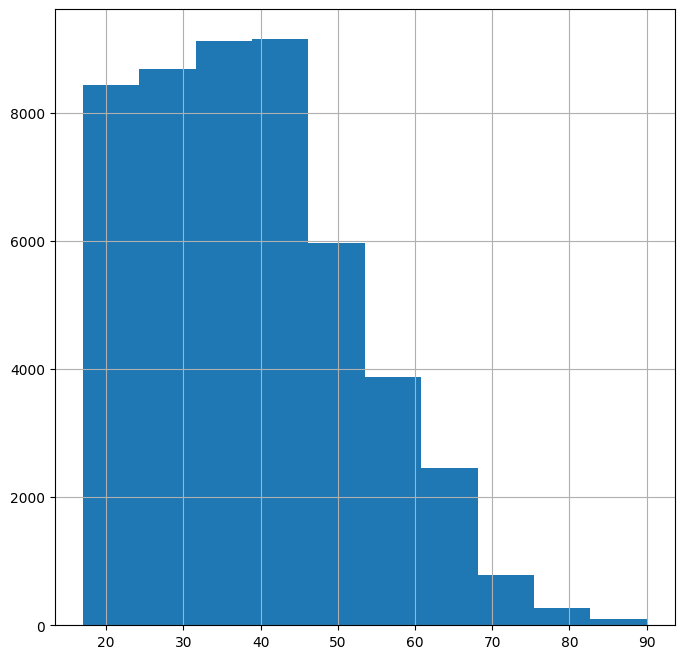

In [5]:
# Visualisasi HISTOGRAM
# Distribusi data dari kolom "Age"
data['age'].hist(figsize=(8,8))
plt.show()

In [6]:
data[data["age"]>70].shape

(868, 15)

### **ii.	Deskripsi**
Histogram di atas menjelaskan bahwa:
*  Atribut "usia" tidak simetris.
*  Miring ke kanan (Tapi ini baik karena orang dewasa yang lebih muda mendapatkan upah bukan yang lebih tua).
*  Usia minimum dan maksimum orang adalah 17 dan 90 tahun.
*  Dataset ini memiliki lebih sedikit pengamatan (868) tentang usia orang setelah usia tertentu, yaitu 70 tahun.

## 2.1.2 Kolom "Income"

### **i. Distribusi**

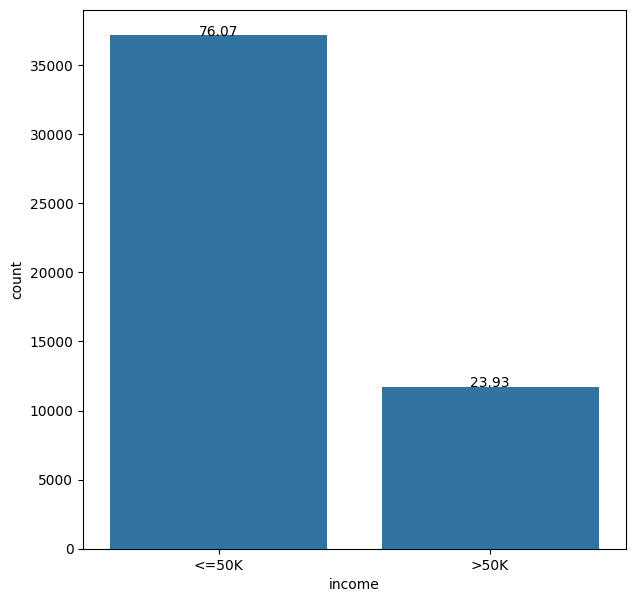

In [7]:
# Visualisasi BOXPLOT
# Distribusi data dari kolom "Income"
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**
Distribusi di atas menjelaskan bahwa **Dataset ini tidak seimbang, yaitu 23,93% di antaranya termasuk dalam kelompok pendapatan 1 (yang berpenghasilan lebih dari \\$50K) dan 76% termasuk dalam kelompok pendapatan 0 (yang berpenghasilan kurang dari \\$50K).**

<a id="3"></a>
# 2.2.Bivariate analysis

- Analisis bivariate melibatkan dua variabel pada saat yang sama dan mencoba untuk memahami hubungan antara keduanya.
- Analisis bivariate sering digunakan untuk menemukan korelasi atau asosiasi antara dua variabel, serta untuk memahami bagaimana variabel satu mempengaruhi variabel lainnya.
- Contoh analisis bivariate meliputi scatter plot, korelasi pearson, korelasi spearman, dan uji-t dua sampel.

## 2.2.1 Kolom "Age" & "income" (Hubungan)

### i. **Boxplot**

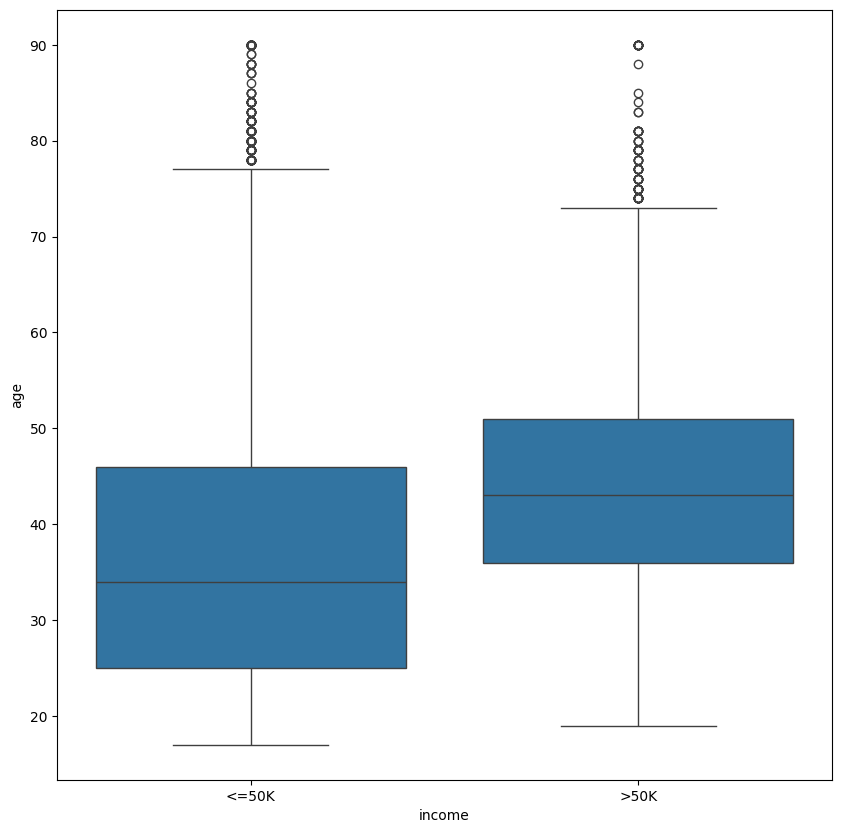

In [8]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [9]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### ii. Deskripsi
Bivariate boxplot di atas menjelaskan bahwa:
* Rata-rata "usia" untuk kelompok penghasilan (<= \\$50K) adalah 36,8 tahun. Dan untuk kelompok penghasilan (> \\$50K) adalah 44,2 tahun.
* Kelompok pendapatan (<=50K) memiliki median "usia" (34 tahun) lebih rendah daripada kelompok pendapatan (>50K) yang memiliki median "usia" (42 tahun).

### iii. Uji Hipotesis (untuk menguji hubungan antara kolom Age & Income )
**Two sampled T-test**:
Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.

Contoh: Apakah ada hubungan antara usia dan pendapatan?

Tentukan null dan alternate hypothesis:

* Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
* Alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis: Tidak ada perbedaan rata-rata usia kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.
*  Alternate Hypothesis: Ada perbedaan rata-rata usia kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.

In [10]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']=='<=50K']['age']
income_0 = data[data['income']=='>50K']['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)


In [11]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval < 0.05:
    print("Kesimpulan: Null hypothesis ditolak")
else:
    print("Kesimpulan: Null hypothesis diterima")

ttest -5.19967079412362
p value 5.096316952865351e-07
Kesimpulan: Null hypothesis ditolak


### iv. Kesimpulan akhir

Menggunakan analisis statistik, dapat disimpulkan bahwa:
* Terdapat perbedaan yang signifikan pada rata-rata usia kelompok berpenghasilan > 50K dan kelompok berpenghasilan <= 50K. Hal Ini membuktikan bahwa usia memiliki peranan dalam membedakan kelompok pendapatan.

# Tugas
1. Buat dan jelaskan univariate analysis untuk kategori <code>hours-per-week</code> dan <code>income</code>
2. Buat dan jelaskan Bivariate analysis untuk hubungan antara <code>hours-per-week</code> dan <code>income</code>

<div class="alert alert-info">
    <strong>Catatan!</strong><br>
    - Pada bagian "...#CODE HERE <...>" digantikan dengan code python sesuai dengan perintah. <br>
    - Pada bagian "...# Ketik disini..." silakan diketikkan jawaban atas pertanyaan yang diberikan menggunakan Bahasa Indonesia.
    </div>

<div class ="alert alert-warning">
Silahkan tambahkan cell code apabila diperlukan.  

</div>

## 1. Univariate analysis

## 1.1 Kolom "hours-per-week"

### **i.	Distribusi**

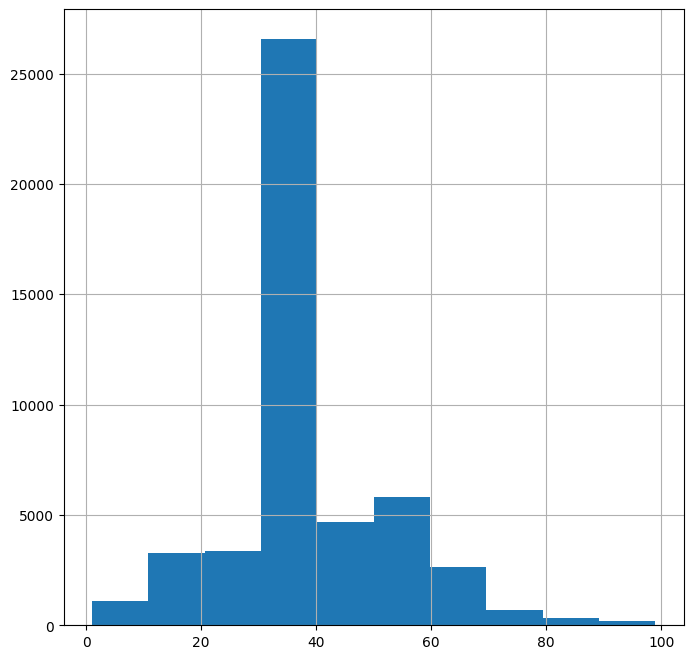

In [12]:
# Buat histogram dari kolom "hours-per-week"
# CODE HERE ...
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

### **ii. Deskripsi**


In [13]:
# Jelaskan hasil diagram tersebut
# Ketik disini ...
# Pada distribusi hours-per-week, terlihat bahwa sebagian besar orang bekerja antara 30 hingga 40 jam per minggu.
# Ada puncak di sekitar 30 dan 40 jam, menunjukkan bahwa banyak orang bekerja di sekitar rentang waktu ini.

## 1.2 Kolom "Income"

### **i.	Distribusi**

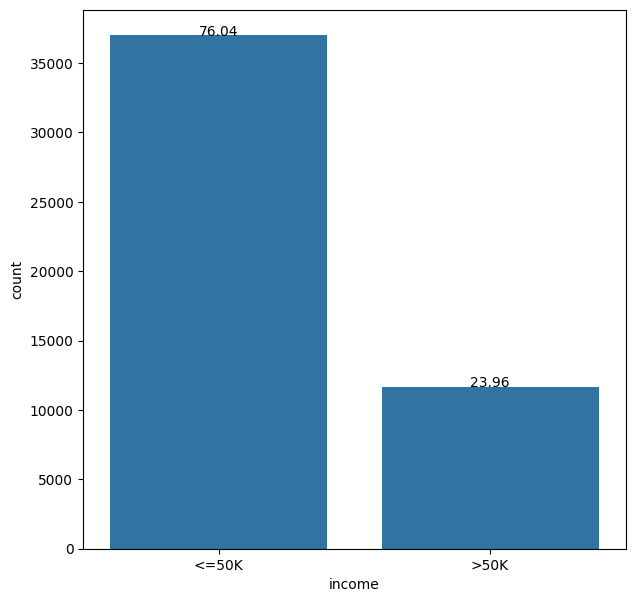

In [14]:
# Buat histogram dari kolom "Income"
# CODE HERE ...
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**

In [15]:
# Jelaskan hasil diagram tersebut
# Ketik disini ...
# Pada distribusi income, jumlah orang dengan penghasilan kurang dari atau sama dengan 50K terlihat lebih banyak dibandingkan jumlah orang dengan penghasilan lebih dari 50K.
# Ini menunjukkan bahwa dalam data ini, sebagian besar pekerja berpenghasilan kurang dari 50K.

# 2. Bivariate analysis

## 2.1 Kolom "hours-per-week" & "income" (Hubungan)

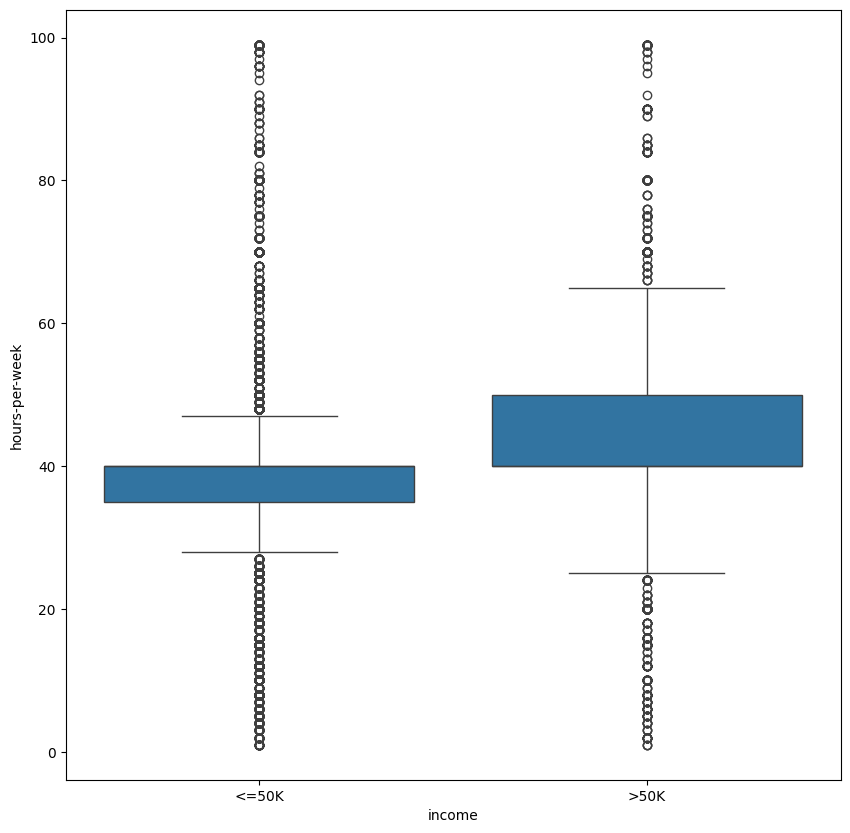

In [16]:
# Buat BOXPLOT, hubungan "hours-per-week" dengan "income"
# CODE HERE ...
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

### ii. Deskripsi

   

In [17]:
# jelaskan hasil diagram tersebut
# Ketik disini ...
# Dari boxplot terlihat bahwa orang dengan penghasilan lebih dari 50K cenderung bekerja lebih lama per minggu dibandingan orang dengan penghasilan kurang dari atau sama dengan 50K.
# Median jumlah jam kerja per minggu untuk orang dengan penghasilan lebih dari 50K lebih tinggi, menunjukkan ada peranan tentang jam kerja terhadap pendapatan seseorang.

### iii. Uji Hipotesis (untuk menguji hubungan antara hours-per-week & income)
Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis: Tidak ada perbedaan rata-rata kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.
*  Alternate Hypothesis: Ada perbedaan rata-rata kelompok pendapatan > 50k dan kelompok pendapatan <= 50k.

In [18]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
# CODE HERE ...
import random
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)]

income_1 = data[data['income'] == '<=50K']['hours-per-week']
income_0 = data[data['income'] == '>50K']['hours-per-week']

income_0 = random.sample(income_0.values.tolist(), 100)
income_1 = random.sample(income_1.values.tolist(), 100)

ttest, pval = ttest_ind(income_1, income_0, equal_var=False)

print("t-test:", ttest)
print("p-value:", pval)

if pval < 0.05:
    print("Kesimpulan: Null hypothesis ditolak")
else:
    print("Kesimpulan: Null hypothesis diterima")


t-test: -3.827301198758298
p-value: 0.00017420705686095343
Kesimpulan: Null hypothesis ditolak


### iv. Kesimpulan akhir


In [19]:
# Berikan kesimpulan
# Ketik disini ...
# Disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata jam kerja perminggu pada berpenghasilan > 50K dengan rerata jam kerja perminggu pada berpenghasilan <= 50K.
# Hal Ini membuktikan bahwa jam kerja mingguan memiliki peranan dalam membedakan kelompok pendapatan gaji paling tinggi dibandingkan gaji paling rendah.

<div class="alert alert-warning">
<strong>Perhatian!</strong> Berikut merupakan cara konversi File IPYNB menjadi File PDF untuk melakukan pengumpulan tugas di Virtual Class. 
    <a href="https://youtu.be/qXELXtnAK7c">Video konversi</a>.
    </div>



---


Copyright © 2024 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma 


https://www.praktikum-hpc.gunadarma.ac.id/